In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prior_probs = np.array([[0.33, 0.3], [0.2, 0.17]])

Text(0.5, 1.0, 'Prior Probabilities')

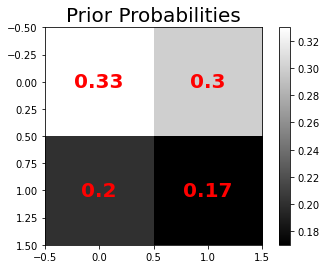

In [3]:
plt.imshow(prior_probs, cmap="gray")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.annotate(
            prior_probs[i, j],
            (j, i),
            color="red",
            fontsize=20,
            fontweight="bold",
            ha="center",
            va="center",
        )

plt.title("Prior Probabilities", fontsize=20)

In [4]:
robot_likelihoods = np.array([[0.5, 0.2], [0.5, 0.75]])

Text(0.5, 1.0, 'Robot Beep Probabilities')

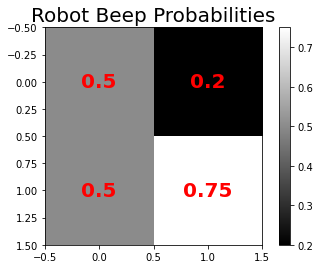

In [5]:
plt.imshow(robot_likelihoods, cmap="gray")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.annotate(
            robot_likelihoods[i, j],
            (j, i),
            color="red",
            fontsize=20,
            fontweight="bold",
            ha="center",
            va="center",
        )

plt.title("Robot Beep Probabilities", fontsize=20)

# Posterior Probability
# $P(S_i|\text{BEEP}) \propto P(\text{BEEP}|S_i) \times P(S_i)$
# $P(S_i|\text{NO BEEP}) \propto P(\text{NO BEEP}|S_i) \times P(S_i)$
# ------------------------------------------------------------------------

# So, if robot beeps
## $P(S_0|\text{BEEP}) \propto P(\text{BEEP}|S_0)P(S_0) = 0.5 \times 0.33 = 0.165$
## $P(S_1|\text{BEEP}) \propto P(\text{BEEP}|S_1)P(S_1) = 0.2 \times 0.3 = 0.06$
## $P(S_2|\text{BEEP}) \propto P(\text{BEEP}|S_2)P(S_2) = 0.5 \times 0.2 = 0.1$
## $P(S_3|\text{BEEP}) \propto P(\text{BEEP}|S_3)P(S_3) = 0.75 \times 0.17 = 0.128$
# Dig at Space 0
# ------------------------------------------------------------------------

# So, if robot does not beep
## $P(S_0|\text{NO BEEP}) \propto P(\text{NO BEEP}|S_0)P(S_0) = 0.5 \times 0.33 = 0.165$
## $P(S_1|\text{NO BEEP}) \propto P(\text{NO BEEP}|S_1)P(S_1) = 0.8 \times 0.3 = 0.24$
## $P(S_2|\text{NO BEEP}) \propto P(\text{NO BEEP}|S_2)P(S_2) = 0.5 \times 0.2 = 0.1$
## $P(S_3|\text{NO BEEP}) \propto P(\text{NO BEEP}|S_3)P(S_3) = 0.25 \times 0.17 = 0.043$
# Dig at Space 1
# ------------------------------------------------------------------------

In [7]:
def generate_treasure(prior_probs):
    u = np.random.random()
    cumulative_probs = prior_probs.flatten().cumsum()
    loc = np.where(u < cumulative_probs)[0][0]
    return loc

In [8]:
def get_robot_beep(loc, robot_likelihoods):
    i, j = loc % 2, loc // 2
    u = np.random.random()
    return u < robot_likelihoods[j, i]

In [9]:
def get_posterior_probs(prior_probs, robot_likelihoods, robot_beep):

    likelihoods = robot_likelihoods if robot_beep else (1 - robot_likelihoods)
    posterior_probs = prior_probs * likelihoods

    return posterior_probs

In [10]:
def show_probs(robot_beep, probs):
    plt.imshow(probs, cmap="gray")
    plt.colorbar()

    for i in range(2):
        for j in range(2):
            plt.annotate(
                round(probs[i, j], 3),
                (j, i),
                color="red",
                fontsize=20,
                fontweight="bold",
                ha="center",
                va="center",
            )

    plt.title("Posterior Probabilities\nRobot Beep = %s" % robot_beep, fontsize=20)
    plt.show()

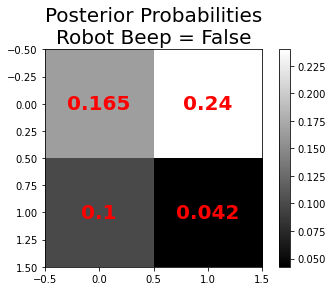

In [12]:
loc = generate_treasure(prior_probs)
robot_beep = get_robot_beep(loc, robot_likelihoods)
posterior_probs = get_posterior_probs(prior_probs, robot_likelihoods, robot_beep)
show_probs(robot_beep, posterior_probs)

In [19]:
trials = 100000

actual_locs = []
prior_preds = []
robot_preds = []
posterior_preds = []

for _ in range(trials):
    loc = generate_treasure(prior_probs)
    robot_beep = get_robot_beep(loc, robot_likelihoods)
    posterior_probs = get_posterior_probs(prior_probs, robot_likelihoods, robot_beep)
    actual_locs.append(loc)
    robot_preds.append(3 if robot_beep else 1)
    posterior_preds.append(np.argmax(posterior_probs.flatten()))
    prior_preds.append(0)

In [20]:
prior_acc = np.mean(np.array(prior_preds) == np.array(actual_locs))
robot_acc = np.mean(np.array(robot_preds) == np.array(actual_locs))
posterior_acc = np.mean(np.array(posterior_preds) == np.array(actual_locs))

In [18]:
print("Prior Accuracy: %s" % prior_acc)
print("Robot Accuracy: %s" % robot_acc)
print("Posterior Accuracy: %s" % posterior_acc)

Prior Accuracy: 0.33031
Robot Accuracy: 0.36753
Posterior Accuracy: 0.40453
